<h1 align="center">NLP-Final Project-Amazon Reviews</h1>

### Ön Bilgi

**Problem Açıklaması:** Amazon İncelemelerini NLP Kullanarak Müşteri Derecelendirmelerine Göre Sınıflandırma
Bu bölümde, projenin temel amacı açıklanıyor. Problemin özeti, müşteri derecelendirmelerine dayalı olarak Amazon incelemelerini sınıflandırmaktır. Burada amaç, inceleme metninin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır. Yani, inceleme metninin içeriğini anlayan bir sınıflandırıcı geliştirmek hedeflenmektedir.

**Etki:**
Müşteri incelemeleri ürünlere objektif geri bildirim sağlar ve bu nedenle tüketiciler için önemlidir. Bu derecelendirmeler genellikle sayısal bir derecelendirme veya yıldız sayısı olarak özetlenir. Ancak, gerçek metin içeriğinde sayılardan daha fazla değer bulunmaktadır. Bazen verilen derecelendirme ürün deneyimini tam olarak iletemeyebilir - geri bildirimin özü aslında metin içeriğinde bulunur. Bu nedenle amaç, bir inceleme parçasının özünü anlayacak ve metin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır.

**Arkaplan:**
Amazon'daki ürün derecelendirmeleri, her müşterinin tüm incelemelerinden toplandığından, her bir bireysel derecelendirme aslında bir yıldızdan beş yıldıza kadar değişen bir tamsayıdır. Bu, tahminlerimizi toplam beş olasılığa sahip ayrık sınıflara indirir. Bu nedenle, temel tahminci olarak gerçek inceleme metnini kullanan gözetimli çok sınıflı bir sınıflandırıcıya sahip olacağız.
Bu çalışma, Doğal Dil İşleme (NLP) alanının bir keşfidir. Bir metin parçasının verilen yıldız derecesini tahmin etme amacı, kelime gömme, konu modellemesi ve boyut indirgeme gibi farklı NLP konularını içerecektir. Buradan hareketle, son bir veri çerçevesine ulaşacağız ve sınıflandırıcımız için en iyi yaklaşımı (en doğru tahminci) bulmak için farklı makine öğrenimi tekniklerini kullanacağız.

**Veri Kümeleri:**
Amazon veri seti, Mayıs 1996'dan Temmuz 2014'e kadar olan tüm listelenen Elektronik ürünlerinin müşteri incelemelerini içerir. Toplamda 1.689.188 inceleme bulunmaktadır ve bunlar 63.001 benzersiz ürün üzerinde 192.403 müşteri tarafından yapılmıştır. Veri sözlüğü aşağıdaki gibidir:

**asin:** İncelenen ürünün benzersiz kimliği, dize

**helpful:** Yardımcı olan kullanıcıların sayısı ve incelemeye oy veren toplam kullanıcı sayısı (yardımcı olmayan oylar dahil), liste

**overall:** İnceleyenin ürüne verdiği puan, int64

**reviewText:** İnceleme metni, dize

**reviewerID:** İncelemeyi yapan kişinin benzersiz kimliği, dize

**reviewerName:** İncelemeyi yapan kişinin belirtilen adı, dize

**summary:** İncelemenin başlık özeti, dize

**unixReviewTime:** İncelemenin ne zaman gönderildiğinin Unix zamanı, dize
Bu açıklamalar, NLP tabanlı bir proje bağlamında yapılan çalışmanın genel anlayışını ve amaçlarını özetlemektedir.

<img src="amazon_reviews.png">

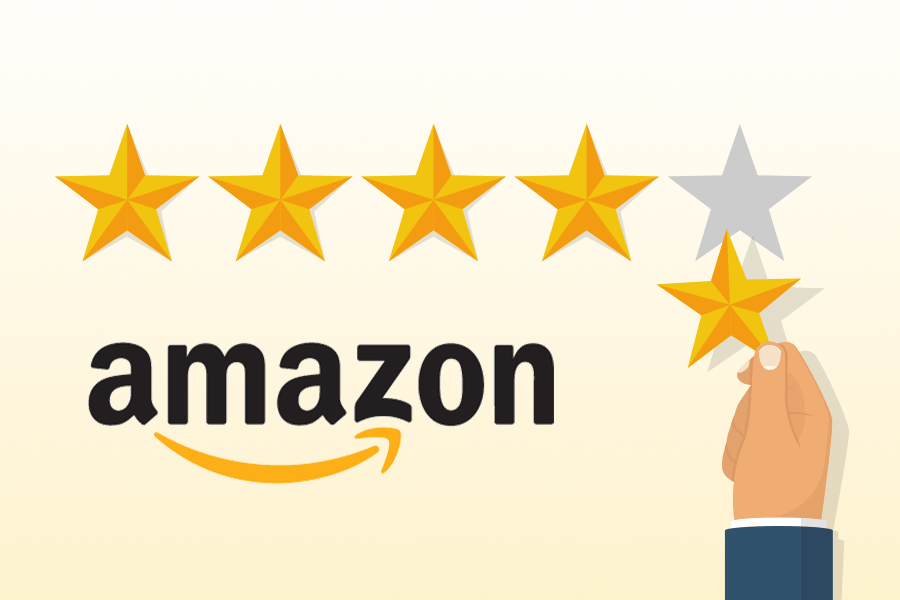

### Veri Düzenleme
Bu bölümde, projenin veri düzenleme ve işleme aşamalarını anlatmaktadır.
Öncelikle, gereksiz uyarıları kapatmak için "warnings" modülü kullanılarak uyarmalar engellenir:

In [37]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

Veri kümesi, "Electronics_5.json" adında bir dosyadan okunmaya çalışılır. Eğer bu dosya mevcutsa, veri çerçevesi ("df") bu dosyadan okunur. Aksi takdirde, veri çerçevesi internetten indirilen bir JSON dosyasından yüklenir:

In [ ]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [ ]:
import pandas as pd

Belirlenen adresten çekilen veriler "csv" dosyasına kaydedilir:

In [ ]:
df.to_csv("amazon.csv")

Kaydedilen veri okunur:

In [ ]:
df=pd.read_csv("amazon.csv")

Merkezi Limit Teoremi (Central Limit Theorem), istatistikte önemli bir kavramdır ve birçok rastgele değişkenin toplamının veya ortalamasının, bağımsız ve aynı dağılıma sahip rastgele değişkenlerin örneklemlerinin ortalamasına yakınsadığını belirtir. Kısacası, büyük bir örneklemin ortalaması normal dağılıma daha yakın olacaktır.

Merkezi Limit Teoremi, bir popülasyonun dağılım şeklinin ne olursa olsun, yeterince büyük bir örneklem alındığında, örneklemin ortalamasının yaklaşık olarak normal dağılıma sahip olduğunu ifade eder. Bu, istatistiksel analizde birçok kez kullanılan ve sonuçların genellenmesine yardımcı olan önemli bir teorem olarak kabul edilir.

"CLT (Central Limit Theoerem)'e göre veri milyonlara ulaştığından sadece 400.000 i ile çalışmak istatiksel olarak yeterli olacak:

In [ ]:
df=df.sample(4000)

Bu kod, Google Colab (Colaboratory) ortamında kullanıldığında, belirtilen dosyanın indirilmesini sağlar. files.download() fonksiyonu, Colab ortamında çalışırken oluşturulan veya işlenen bir dosyanın kullanıcıya indirilmesini sağlar.

In [ ]:
from google.colab import files
files.download("amazon.csv")

FileNotFoundError: ignored

Veri setinin bellek kullanımı ve sütun türleri "info()" fonksiyonuyla görüntülenir:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 839517 to 1102797
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4000 non-null   int64 
 1   reviewerID      4000 non-null   object
 2   asin            4000 non-null   object
 3   reviewerName    3938 non-null   object
 4   helpful         4000 non-null   object
 5   reviewText      3999 non-null   object
 6   overall         4000 non-null   int64 
 7   summary         4000 non-null   object
 8   unixReviewTime  4000 non-null   int64 
 9   reviewTime      4000 non-null   object
dtypes: int64(3), object(7)
memory usage: 343.8+ KB
None


In [ ]:
!ls -al

total 1234540
drwxr-xr-x 1 root root       4096 Aug 18 11:47 .
drwxr-xr-x 1 root root       4096 Aug 18 11:45 ..
-rw-r--r-- 1 root root 1264147732 Aug 18 13:10 amazon.csv
drwxr-xr-x 4 root root       4096 Aug 16 13:41 .config
drwxr-xr-x 1 root root       4096 Aug 16 13:42 sample_data


In [ ]:
dir

<function dir>

Unix zaman damgaları ("unixReviewTime"), daha sezgisel bir veri türü olan tarih ve saat nesnelerine dönüştürülür:

In [ ]:
import datetime

condition = lambda row: datetime.datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

Gereksiz olan "reviewTime" sütunu veri çerçevesinden çıkarılır:

In [ ]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
839517,839517,A1UR1WLEZEYDMJ,B003WJR69E,Y. Wang,"[0, 2]",Sure this camera has a lot of features if you ...,3,80-20 rules,01-05-2014
317146,317146,A3RBVDH87QF1A,B000UEZ36W,"R. Hershey ""Movie Maestro""","[0, 0]",This pad is very soft and comfortable to the t...,5,Great mousing surface,06-08-2014
320301,320301,A33H0WC9MI8OVW,B000UVNIA8,Clare Chu,"[34, 34]",This photo frame gives you instant gratificati...,5,"Fast, easy to use, and large 800x600 resolution",04-06-2008
1114532,1114532,A1VVRW2FBRZ7AK,B005DKZTMG,ALL83,"[0, 0]",Bought this for work and another one for our h...,4,Inexpensive Wireless Keyboard,11-26-2013
1454382,1454382,A3U3Z6HB5V8ECV,B0097BPOAE,Bryan,"[0, 0]",good battery for the price. definitely did no...,4,good battery for the price,08-14-2013


Veri çerçevesinde örnek bir yorum yazısı görüntülenir:

In [ ]:
print(df["reviewText"].iloc[33])

Makes it easy to arm and disarm the Honeywell (also called ADEMCO, I don't know why) security system.  As simple as using the keyless entry on a car.  They have a nicer, and more expensive, unit that talks.  It confirms that your system is armed, but we didn't have a need for that functionality.


Son olarak, veri seti "overall" sütunundaki unique derecelendirmeleri görüntülemek için kullanılır:

In [ ]:
print(df["overall"].unique())

[3 5 4 1 2]




```
# Bu, kod olarak biçimlendirilmiştir
```

Görsel olarak görmek istediğimizde:

<Axes: >

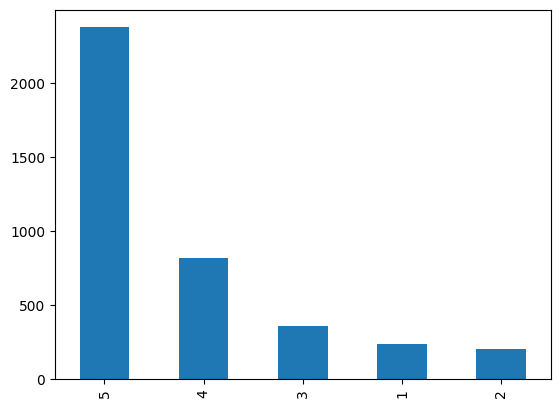

In [ ]:
df.overall.value_counts().plot.bar()

NLP Proje öncesi yapılması gerekenler
#### 1-Yazıdaki tüm harfleri küçük harfe çevir
#### 2-Noktalama işaretlerini kaldır
#### 3-Rakamları kaldır
#### 4-Satır sonlarını kaldır
#### 5-Gereksiz kelimeleri çıkart (Stopwords)
#### 6-Tokenize et
#### 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
#### 8-Vektörize et

In [ ]:
# Rastgele aldıklarımız
s_review = df["reviewText"].iloc[3999]
print(s_review)

The USB cord can be transferred to either right or left side depending on the location of your USB port on the laptop. This unit is also very thin and light and is easily portable. The fan itself is also huge and is able to cover any intake on your laptop. Finally, the fan runs very quietly and you won't hear it.I brought this for my friend and it stops his laptop from overheating completely. He can now also play more memory intensive games since his laptop does not overheat.


In [ ]:

#Html eklentileri çıkar
import html

dec_review = html.unescape(s_review)
print(dec_review)

The USB cord can be transferred to either right or left side depending on the location of your USB port on the laptop. This unit is also very thin and light and is easily portable. The fan itself is also huge and is able to cover any intake on your laptop. Finally, the fan runs very quietly and you won't hear it.I brought this for my friend and it stops his laptop from overheating completely. He can now also play more memory intensive games since his laptop does not overheat.


In [ ]:
#Noktalamaları kaldır
pattern = r"\&\#[0-9]+\;"
df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)
print(df["preprocessed"].iloc[3999])

I am a fan of this little lens - it's been on my camera non-stop since receiving it and I've gotten some great pictures out of it. Including some excellent portrait shots. (fyi, I shoot on both a full frame and a crop sensor). On the full frame, I do notice the slight vignetting that everyone talks about, but it's not a big deal. On the crop sensor - I wish it was a bit wider - it's 64mm equivalent.It's a great price and image quality is really fantastic. I don't notice the noise that some people complain about - yes, you can hear it if you try, but when I'm shooting, I'm in the zone and I can't recall being bothered by it, or even noticing it while shooting for that matter. Order it - you won't regret it.


In [ ]:
pip install nltk

In [ ]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["reviewText"]=df["reviewText"].str.lower() #küçük harfe çevrildi
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["reviewText"]=df["reviewText"].str.replace("\d+","") #d digit rakamları kaldırır
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [ ]:
df.loc[df["overall"]==3,"sentimentOverall"]="neutral"
df.loc[df["overall"]<3,"sentimentOverall"]="negative"
df.loc[df["overall"]>3,"sentimentOverall"]="positive"

<Axes: >

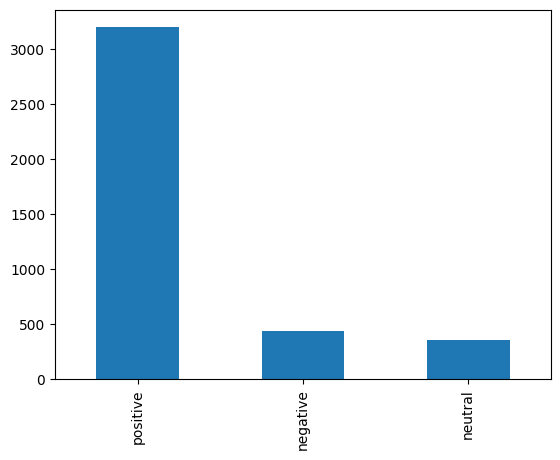

In [ ]:
df["sentimentOverall"].value_counts().plot.bar()

In [ ]:
from unicodedata import normalize
df["reviewText"]=df["reviewText"].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Aksanları ortadan kaldırdık

In [ ]:
# Lang Detect
!pip install langdetect
from langdetect import detect
df['language']=df["reviewText"].apply(detect)
df=df[df['language']=='en']
df

LangDetectException: ignored

In [ ]:
# 5-Gereksiz kelimeleri çıkart (Stopwords)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df["reviewText"]=df["reviewText"].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 6-Tokenize et
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df["reviewText"].values]

In [ ]:
# 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df["reviewText"].values]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [ ]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [ ]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [ ]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,sentimentOverall,lemmatize,tokenized,polarity,subjectivity,sentimentPolarity
839517,839517,A1UR1WLEZEYDMJ,B003WJR69E,Y. Wang,"[0, 2]",sure camera lot features read page manual tho...,3,80-20 rules,01-05-2014,neutral,"[s, u, r, e, , t, h, i, s, , c, a, m, e, r, ...","[sure, camera, lot, features, read, page, manu...",0.218056,0.538426,positive
317146,317146,A3RBVDH87QF1A,B000UEZ36W,"R. Hershey ""Movie Maestro""","[0, 0]",pad soft comfortable touch mouse glides pad e...,5,Great mousing surface,06-08-2014,positive,"[t, h, i, s, , p, a, d, , i, s, , v, e, r, ...","[pad, soft, comfortable, touch, mouse, glides,...",0.325000,0.612500,positive
320301,320301,A33H0WC9MI8OVW,B000UVNIA8,Clare Chu,"[34, 34]",photo frame gives instant gratification even w...,5,"Fast, easy to use, and large 800x600 resolution",04-06-2008,positive,"[t, h, i, s, , p, h, o, t, o, , f, r, a, m, ...","[photo, frame, gives, instant, gratification, ...",0.112302,0.330584,negative
1114532,1114532,A1VVRW2FBRZ7AK,B005DKZTMG,ALL83,"[0, 0]",bought work another one home theater system w...,4,Inexpensive Wireless Keyboard,11-26-2013,positive,"[b, o, u, g, h, t, , t, h, i, s, , f, o, r, ...","[bought, work, another, one, home, theater, sy...",-0.093750,0.750000,positive
1454382,1454382,A3U3Z6HB5V8ECV,B0097BPOAE,Bryan,"[0, 0]",good battery price definitely last long oem v...,4,good battery for the price,08-14-2013,positive,"[g, o, o, d, , b, a, t, t, e, r, y, , f, o, ...","[good, battery, price, definitely, last, long,...",0.150000,0.398148,negative


<Axes: >

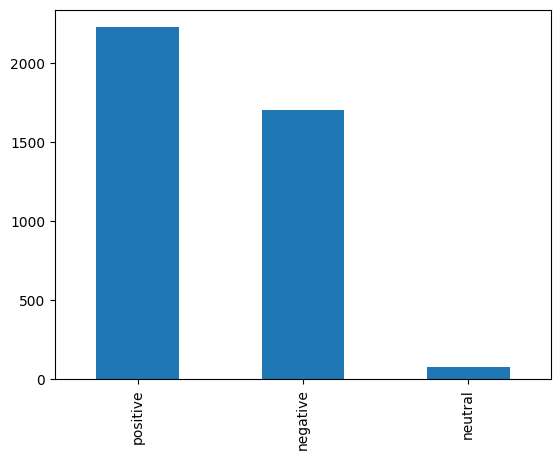

In [ ]:
df["sentimentPolarity"].value_counts().plot(kind="bar")

Bu kod parçası, metin verilerinin "tokenization" adı verilen bir işleme tabi tutulduğu ve belirli bir örnek inceleme belgesinin nasıl kelimelere veya "token"lara ayrıldığını gösterir.

In [ ]:
corpora = df["reviewText"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0])

['sure', 'camera', 'lot', 'features', 'read', '', 'page', 'manual', 'thought', 'good', 'product', 'design', 'address', '', 'use', 'leaving', 'rest', '', 'thumbing', 'manual', 'way', 'around', 'really', 'dont', 'need', 'go', 'camera', 'school', 'take', 'better', 'pictures', 'two', 'things', 'still', 'hard', 'time', 'figuring', '', 'common', 'use', 'download', 'video', 'macbook', 'builtin', 'flash', 'doesnt', 'fire', 'yes', 'popped', 'ia', 'nonburst', 'mode', 'someone', 'pops', 'flash', 'doesnt', 'indicate', 'intend', 'use']


# N-Gram
N-gram, doğal dil işleme ve istatistiksel dil modellemesinde sıkça kullanılan bir terimdir. Bir metin veya kelime dizisi içinde ardışık n elemanlık (genellikle kelimeler veya karakterler) parçaları ifade eder. Bu n elemanlık parçalar, metin içindeki sıralı örüntüleri yakalamak ve dil yapısını analiz etmek için kullanılır.

Örneklerle açıklamak gerekirse:

Unigram (1-gram): Metni tek kelimelik parçalara böler. Örneğin, "Merhaba, nasılsınız?" cümlesini unigramlara ayırırsak: ["Merhaba", ",", "nasılsınız", "?"]

Bigram (2-gram): Metni ardışık iki kelimelik parçalara böler. Örneğin, yine aynı cümleyi bigramlara ayırırsak: ["Merhaba,", "nasılsınız", "?"]

Trigram (3-gram): Metni ardışık üç kelimelik parçalara böler. Örneğin, yine aynı cümleyi trigramlara ayırırsak: ["Merhaba,", "nasılsınız?"]

n-gram'lar, dil yapısını analiz etmek, metin örüntülerini ve ilişkilerini incelemek, kelime tahminlemesi ve belirli kelimelerin birbirini takip eden sıklığını hesaplamak gibi pek çok NLP görevinde kullanılır. Özellikle dil modelleri ve metin tahminleme algoritmalarında n-gram'lar önemli bir role sahiptir.

In [ ]:
##Cümleleri Modelliyoruz.
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

Yukarıdaki kod parçası, "Phrase Modeling" adı verilen bir işlemi göstermektedir. Bu işlem, belirli kelimelerin veya kelime gruplarının bir arada bulunma sıklığına dayalı olarak ifadeleri gruplandırmayı amaçlar. Bu tür ifadeler, komşu kelimelerin bir arada kullanımıyla daha anlamlı hale gelir ve metin analizi modelleri için daha zengin bir anlam taşır.

Aşağıda adım adım açıklamaları bulabilirsiniz:

In [ ]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['usedso', 'unsuccessful', 'picks', 'ultrathin', 'routers', 'lampive', 'devicevery', 'unified', 'graphicsgross', 'knowthe', 'mytrends', 'volumesmy', 'replacedthis', 'brandof', 'interest', 'accepting', 'fighting', 'dragonfly', 'selfportaits', 'coolertemperature', 'songs', 'lines', 'glovelike', 'xetc', 'qualitymic', 'rockin', 'select', 'bibliophile', 'boondocks', 'welldvd', 'devicecable', 'keysthe', 'ebooks', 'audibly', 'statistical', 'comfy', 'event', 'bags', 'infact', 'wirelessly', 'shinny', 'declined', 'networks', 'crts', 'depletion', 'pressboard', 'hight', 'novelty', 'dt', 'highercame']


In [ ]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))

bi_gram_tokens = set([token.encode().decode("utf-8") \
                      for token in bi_gram_tokens])
bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['']


In [ ]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.encode().decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


Phrases sınıfı kullanılarak "bigram" ve "trigram" ifadeler oluşturuluyor. Bu ifadeler, belirli bir sıklık ve eşik değeri kullanılarak bir araya getirilen komşu kelimelerden oluşur.

In [ ]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

Bu adımda, oluşturulan bigram ve trigram ifadeleri, metin verilerinin üzerine uygulanır. Bu, metin verilerinin daha spesifik ve anlamlı ifadelerle temsil edilmesine yardımcı olur.

In [ ]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[0])

['sure', 'camera', 'lot', 'features', 'read', 'page', 'manual', 'thought', 'good', 'product', 'design', 'address', 'use', 'leaving', 'rest', 'thumbing', 'manual', 'way', 'around', 'really', 'dont', 'need', 'go', 'camera', 'school', 'take', 'better', 'pictures', 'two', 'things', 'still', 'hard', 'time', 'figuring', 'common', 'use', 'download', 'video', 'macbook', 'builtin', 'flash', 'doesnt', 'fire', 'yes', 'popped', 'ia', 'nonburst', 'mode', 'someone', 'pops', 'flash', 'doesnt', 'indicate', 'intend', 'use']


Metin belgelerinde yalnızca bir karakter içeren ifadeler kaldırılır. Bu, daha anlamlı ve bilgi taşıyan ifadeleri korumak için yapılır.
Bu adımlar, metin verilerinin içeriğini daha anlamlı ve temsilci ifadelerle zenginleştirmek ve sonuç olarak daha iyi analiz yapmak için kullanılır.

Bu kod parçası, metin verilerini sayısal özelliklere dönüştürmek için kullanılan çeşitli yöntemleri ve işlemleri açıklar. Metin verilerinin sayısal temsilini oluşturarak makine öğrenimi modellerinin bu verileri kullanabilmesini sağlar. Aşağıda adım adım açıklamaları bulabilirsiniz:

**Vocabulary Oluşturma:**
Bu adımda, tüm benzersiz "token"ları içeren bir "vocabulary" veya sözlük oluşturulur. Her "token" bir benzersiz kimlik (ID) ile eşleştirilir. Bu kısım, metin verilerindeki kelimeleri sayısal temsillemeye hazırlamak için kullanılır.

In [38]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: address
ID: 1, Token: around
ID: 2, Token: better
ID: 3, Token: builtin
ID: 4, Token: camera
ID: 5, Token: common
ID: 6, Token: design
ID: 7, Token: doesnt
ID: 8, Token: dont
ID: 9, Token: download


**Bag of Words (BoW) Modeli:**
BoW modeli, belgeyi kelimelerin sıklığına dayalı olarak sayılarla ifade eder. Her girdi bir belge iken, her sütun tüm veri kümesindeki benzersiz "token"lara karşılık gelir. Satır, bir kelimenin belgede kaç kez göründüğünü belirtir.

In [39]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: address, Frequency: 1
Word: around, Frequency: 1
Word: better, Frequency: 1
Word: builtin, Frequency: 1
Word: camera, Frequency: 2
Word: common, Frequency: 1
Word: design, Frequency: 1
Word: doesnt, Frequency: 2
Word: dont, Frequency: 1
Word: download, Frequency: 1
Word: features, Frequency: 1
Word: figuring, Frequency: 1
Word: fire, Frequency: 1
Word: flash, Frequency: 2
Word: go, Frequency: 1
Word: good, Frequency: 1
Word: hard, Frequency: 1
Word: ia, Frequency: 1
Word: indicate, Frequency: 1
Word: intend, Frequency: 1
Word: leaving, Frequency: 1
Word: lot, Frequency: 1
Word: macbook, Frequency: 1
Word: manual, Frequency: 2
Word: mode, Frequency: 1
Word: need, Frequency: 1
Word: nonburst, Frequency: 1
Word: page, Frequency: 1
Word: pictures, Frequency: 1
Word: popped, Frequency: 1
Word: pops, Frequency: 1
Word: product, Frequency: 1
Word: read, Frequency: 1
Word: really, Frequency: 1
Word: rest, Frequency: 1
Word: school, Frequency: 1
Word: someone, Frequency: 1
Word: still, Fr

**TF-IDF Modeli:**
TF-IDF modeli, BoW modelinin aksine kelime sıklığı yerine sürekli değerler atar. Genelde sıkça görünen kelimeler belge içinde daha düşük ağırlığa sahipken, belirli belgelere özgü olan kelimeler daha yüksek ağırlığa sahip olur. TF-IDF ağırlamaları, önceki BoW değişkenimize dayanır.

In [40]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: address, Weight: 0.158
Word: around, Weight: 0.080
Word: better, Weight: 0.066
Word: builtin, Weight: 0.150
Word: camera, Weight: 0.150
Word: common, Weight: 0.162
Word: design, Weight: 0.104
Word: doesnt, Weight: 0.157
Word: dont, Weight: 0.059
Word: download, Weight: 0.133
Word: features, Weight: 0.105
Word: figuring, Weight: 0.210
Word: fire, Weight: 0.138
Word: flash, Weight: 0.225
Word: go, Weight: 0.075
Word: good, Weight: 0.045
Word: hard, Weight: 0.087
Word: ia, Weight: 0.246
Word: indicate, Weight: 0.201
Word: intend, Weight: 0.201
Word: leaving, Weight: 0.168
Word: lot, Weight: 0.086
Word: macbook, Weight: 0.130
Word: manual, Weight: 0.249
Word: mode, Weight: 0.116
Word: need, Weight: 0.065
Word: nonburst, Weight: 0.268
Word: page, Weight: 0.149
Word: pictures, Weight: 0.110
Word: popped, Weight: 0.185
Word: pops, Weight: 0.183
Word: product, Weight: 0.065
Word: read, Weight: 0.097
Word: really, Weight: 0.062
Word: rest, Weight: 0.146
Word: school, Weight: 0.171
Word: s

**Word Embedding (Kelime Gömme) için Özellik Mühendisliği:**
Bu kısım, "Word2Vec" yöntemini kullanarak kelime gömme modelini oluşturur. Word2Vec, kelimeleri vektörlerle temsil ederek semantik anlamı yakalar. Her adım, belge içindeki her kelimeyi bir token olarak ele alır ve komşu kelimelerle birlikte merkez kelimenin olasılığını ölçer.

In [41]:
from gensim.models import Word2Vec

In [60]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec = word2vec.Word2Vec(tokenized, vector_size=feature_size, \
                            window=context_size, min_count=min_word, \
                            epochs=50, seed=42)

#word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            #window=context_size, min_count=min_word, \
                            #iter=50, seed=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 46.2 s, sys: 228 ms, total: 46.5 s
Wall time: 28.3 s


In [61]:
# Son Haliyle DATAmız

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
#Bu kod parçası, "word_vec" modelini kullanarak metin verilerindeki benzersiz "token"ları toplamayı ve bu "token"ların her birini birer özellik olarak kullanarak bir veri çerçevesi oluşturmayı amaçlamaktadır. Aşağıda kodun amacını adım adım açıklamalarıyla inceleyelim:
#word_vec Modelinden Benzersiz Tokenları Toplama:
#word_vec_unpack = [(word, idx.index) for word, idx in word_vec.wv.vocab.items()]
#Bu satır, "word_vec" modelindeki benzersiz "token"ları ("word") ve bu "token"ların indekslerini toplar. Bu indeksler, "word_vec" modelindeki her bir kelimenin vektörünün depolandığı dizini temsil eder.

#Tokenları ve İndeksleri Ayırma:
#tokens, indexes = zip(*word_vec_unpack)
#Bu satır, toplanan "token"ları ve ilgili indeksleri ayırarak iki farklı demet ("tuple") oluşturur. "tokens" demeti, tüm benzersiz "token"ları içerirken "indexes" demeti, ilgili indeksleri içerir.

#word_vec_df Veri Çerçevesi Oluşturma:
#word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)
#Bu satırda, "word_vec" modelindeki vektörleri kullanarak bir veri çerçevesi ("word_vec_df") oluşturulur. Bu veri çerçevesi, her bir benzersiz "token"ın vektör temsilini içerir ve her bir "token" bir satır olarak temsil edilir. İndeksler, "tokens" demetinde toplanan benzersiz "token"ları temsil eder.

#word_vec_df Veri Çerçevesinin Görüntülenmesi:
#display(word_vec_df.head())
#Bu satır, oluşturulan "word_vec_df" veri çerçevesinin ilk birkaç satırını görüntüler. Bu, veri çerçevesinin nasıl oluşturulduğunu ve "token"ların vektör temsillerini nasıl içerdiğini görsel olarak anlamamıza yardımcı olur.

#Kısacası, bu kod parçası "word_vec" modelinden elde edilen vektör temsilini kullanarak her bir benzersiz "token"ı bir özellik olarak içeren bir veri çerçevesi oluşturur. Bu, metin verilerinin sayısal temsillerini içeren bir yapı oluşturarak daha sonra analiz ve modelleme işlemleri için kullanılabilir.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
word_vec_unpack = [(word, word_vec.wv.key_to_index[word]) for word in word_vec.wv.index_to_key]

tokens, indexes = zip(*word_vec_unpack)

word_vec_matrix = [word_vec.wv.get_vector(word) for word in tokens]
word_vec_df = pd.DataFrame(word_vec_matrix, index=tokens)

display(word_vec_df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,-2.670883,0.097440,-0.349490,-2.792448,0.958814,2.291163,-2.674060,0.672228,0.732515,-2.079945,...,2.213071,1.371946,0.520225,2.760486,0.324179,-1.103905,0.317192,-0.572537,2.868656,0.004662
use,0.747330,-2.197187,-0.822136,-0.288582,0.676762,3.522895,3.501667,2.139393,-1.005605,-0.602756,...,1.283254,-1.536603,-1.290652,0.559984,1.907815,-1.418947,0.480670,-2.200272,4.934569,-1.333745
great,0.753547,3.714190,-2.348811,0.177950,0.294774,-0.930669,-1.273048,3.444868,-0.283579,0.829310,...,-2.488225,-0.781363,0.919699,0.555670,1.409835,-0.026828,1.758480,-1.354728,1.644784,-1.504330
like,-1.639547,0.377742,-3.451995,0.065264,-2.223347,-2.033456,2.062996,-0.474070,-2.376285,-2.642953,...,-0.685769,-0.439015,-1.578119,-2.253464,0.900571,2.166980,-3.507663,-0.003003,-2.240653,-1.158244
good,-1.549150,1.274385,-3.121739,1.690278,0.382596,-1.001632,-1.928414,-1.800153,1.863491,-5.123365,...,3.663320,1.427657,1.707864,0.305297,-2.220408,-1.283620,0.778740,2.359299,2.144752,-2.321733


In [64]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 4.9 s, sys: 18.9 ms, total: 4.92 s
Wall time: 4.99 s


In [65]:
f_df = pd.DataFrame(model_array)
f_df["label"] = df["overall"]

display(f_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.381909,-0.362147,-0.559378,-0.281336,-0.543376,0.171907,1.548717,0.717679,-0.398399,0.172127,...,-0.221318,-0.263357,-0.076523,0.011783,0.221571,0.399120,-1.246235,1.088198,0.034805,NaN
1,-0.946591,-1.149416,-1.230036,1.737443,-2.009217,0.585298,1.244906,1.456528,0.229326,1.448564,...,0.156577,-0.765429,0.788966,0.352425,-0.929215,-0.875599,-0.672136,1.228864,-0.932535,NaN
2,1.130547,-0.030004,-0.258745,0.060088,-0.997397,0.697382,1.177075,0.017072,-0.088631,-0.253271,...,0.961937,-0.046146,0.039950,-0.662343,0.508690,-0.075680,-1.092624,0.354916,-0.177170,NaN
3,0.241576,-0.774622,-1.021160,-0.599989,-0.523821,0.908250,-0.116082,0.223433,-0.221243,-0.236206,...,0.388277,-0.222927,0.395850,-0.026346,0.024163,1.131752,-0.254677,0.747666,-0.886873,NaN
4,0.353542,0.273029,-0.368564,-0.231083,0.568486,0.617580,0.260238,-1.481461,1.022425,-0.645889,...,0.599038,-0.185955,0.530929,-0.624075,-0.531261,0.091532,0.026331,0.397545,-1.694077,NaN


In [66]:
#Bu kod parçası, "word_vec_df" veri çerçevesinin belirli bir "tokenized" inceleme içinde görünen kelimelerle kesilmesini ve her boyutta ortalamanın alınmasını sağlar. Böylece elde edilen "model_array" matrisi, eksen 0'da kelime sayısını ve eksen 1'de boyut sayısını temsil eder. Bu işlem, her bir inceleme için birden fazla kelime gömme vektörünü bir gözlem haline getirir.
#Eğer bir kelime incelemeye birden fazla kez eklenirse, bu sadece o kelimenin vektörlerinin değerleri yönünde satırı çeker, bu da o kelimenin vektörünün ortalama değerlerine daha fazla vurgu yapar.
#Tokenized Veriyi Numpy Dizisine Dönüştürme:
#%%time
#tokenized_array = np.array(tokenized)
#Bu satır, "tokenized" değişkenini bir Numpy dizisine dönüştürür. Bu, her incelemenin belirli bir dizi "token"dan oluştuğu yapıyı temsil eder.

#model_array Oluşturma:
#model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])
#Bu satırda, her inceleme için ilgili "tokenized" dizisinin "word_vec_df" içindeki karşılık gelen satırlarını alarak boyutlar boyunca ortalama değeri hesaplar. Böylece her inceleme için bir vektör temsilini elde ederiz.

#Bu işlem, metin incelemelerini sayısal vektör temsillerine dönüştürmek için kullanılır. Sonuç olarak, her bir inceleme için bir vektör elde edilir ve bu vektörler daha sonra analiz, kümeleme veya sınıflandırma gibi işlemlerde kullanılabilir.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bu kısım, Latent Dirichlet Allocation (LDA) adlı bir konu modelleme tekniğini ele alıyor. LDA, belirli konulara göre belgeleri bir araya getirerek sınıflandırır ve gruplar. Elektronik ürünlerine ait ürün incelemeleri, her bir konuya ağırlıklar atanmış olur ve konuların kendileri de her kelime üzerinde ağırlıklara sahip olurlar. LDA bir kümeleme tabanlı bir model olduğundan, yalnızca num_topics (konu sayısı) ayarlanabilir.

Aşağıda, ilk ürün incelemeleri grubuna özgü en belirgin beş kelime verilmiştir.

In [67]:
%%time
import multiprocessing
from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


camera 0.013594958
use 0.008919531
like 0.007909865
one 0.0071379393
great 0.0069748973
CPU times: user 19.2 s, sys: 948 ms, total: 20.1 s
Wall time: 34.3 s


Bu kod, LDA modelini oluşturmak ve belirli bir konu grubuna ait en belirgin kelimeleri görüntülemek için kullanılır.

Daha sonra, her bir konu grubuna ait belirgin kelimeleri görmek için aşağıdaki şekilde döngü oluşturulur:

In [68]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 camera, 0.013594957999885082
 use, 0.008919530548155308
 like, 0.007909865118563175
 one, 0.0071379393339157104
 great, 0.006974897347390652

Topic 2:
 tv, 0.005505938082933426
 use, 0.005324888043105602
 would, 0.005208729300647974
 get, 0.004792905878275633
 lens, 0.004431559704244137

Topic 3:
 great, 0.011171381920576096
 quality, 0.009776758030056953
 one, 0.007651835214346647
 like, 0.007515460718423128
 good, 0.007340952754020691

Topic 4:
 one, 0.007413257844746113
 get, 0.006759872660040855
 use, 0.006704279221594334
 work, 0.006487512495368719
 would, 0.006482861936092377

Topic 5:
 one, 0.009117655456066132
 well, 0.0075320228934288025
 good, 0.0072991978377103806
 case, 0.004737581126391888
 new, 0.00473265303298831

Topic 6:
 one, 0.009562820196151733
 great, 0.0072336564771831036
 use, 0.006011461839079857
 get, 0.005630183033645153
 good, 0.005130460951477289

Topic 7:
 cable, 0.00883917510509491
 great, 0.007229771465063095
 works, 0.007227309979498386
 use, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Bu kod, her bir konu grubuna ait en belirgin kelimeleri gösterir.

Ayrıca, pyLDAvis adlı bir kütüphane kullanarak LDA ile türetilen konulara ilişkin kelimeleri etkileşimli olarak inceleyebiliriz. İntertopic Distance Map, benzerlik nedeniyle bazı ürün incelemelerinin bir konuda diğerleriyle nasıl yakınsadığını gösterir. İhtiyaç halinde, num_topics'u ayarlayarak konu kesişimlerini kümeleyebilir ve sınıflar arasında daha belirgin bir karar sınırı oluşturabilirsiniz.



In [69]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
cores = multiprocessing.cpu_count() // 2  # veya başka bir değer
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
import pyLDAvis.gensim

with multiprocessing.Pool(processes=1):
    lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: ignored

Bu kod parçası, pyLDAvis kullanarak LDA ile türetilen konulara ait kelimeleri etkileşimli olarak görselleştirmek için kullanılır. İntertopic Distance Map, konular arasında yakınlığı ve benzerliği gösteren bir görsel sunar. Bu, konuların ne kadar iyi ayrıldığını anlamak ve gerektiğinde num_topics parametresini ayarlamak için kullanışlı bir araçtır.

In [75]:
### WORDCLOUD
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("hand.jpg"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
possitive_data_overall_sentiment=df[df["sentimentOverall"]=="positive"]["reviewText"]
negative_data_overall_sentiment=df[df["sentimentOverall"]=="negative"]["reviewText"]
neutral_data_overall_sentiment=df[df["sentimentOverall"]=="neutral"]["reviewText"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


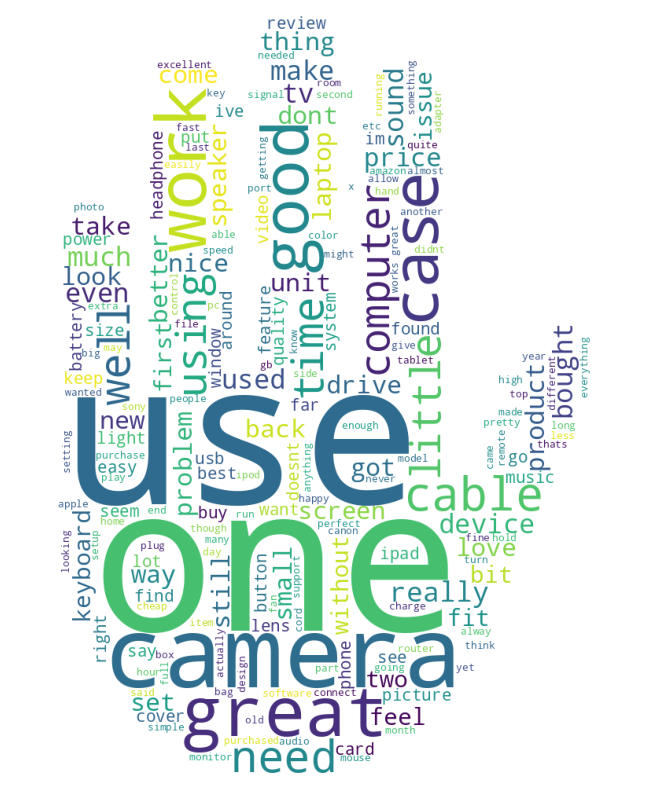

In [90]:
wc(possitive_data_overall_sentiment,"white")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


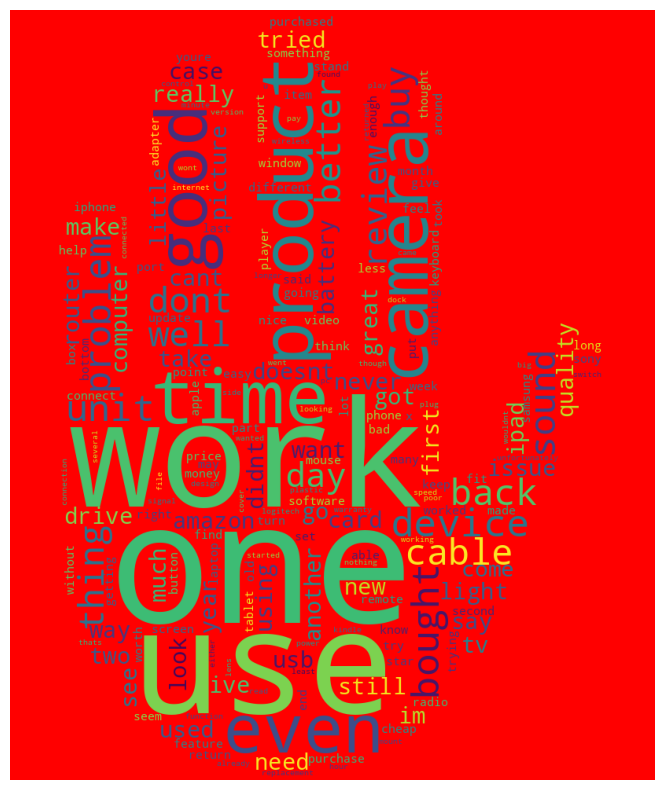

In [91]:
wc(negative_data_overall_sentiment,"red")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


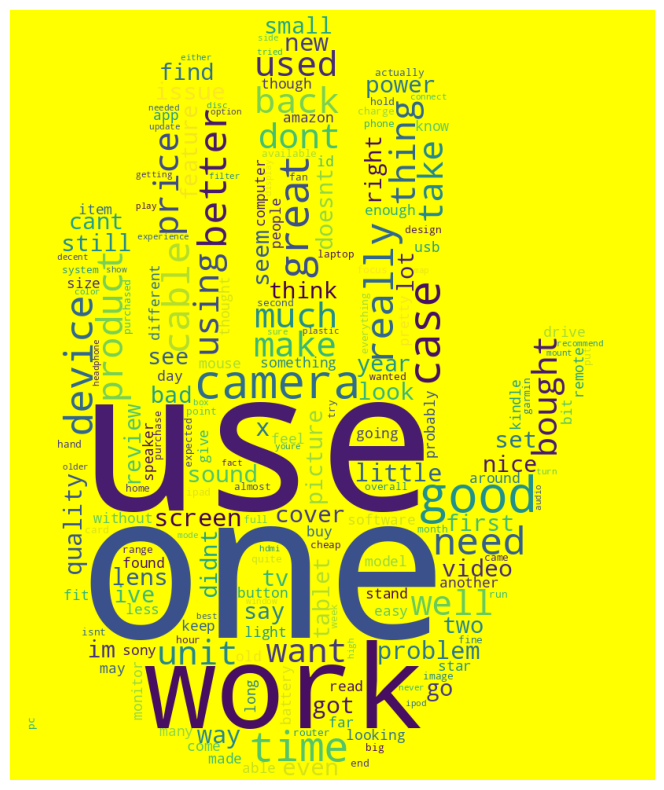

In [93]:
wc(neutral_data_overall_sentiment,"yellow")

In [ ]:
# Modelleme

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# 8-Vektörize et
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Classification Modelleme

Overall'e göre classification işlemi yapalım

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
df.overall=df.overall.astype("category")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
x,y=df['reviewText'],df['sentimentOverall']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
x.shape,y.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((4000,), (4000,))

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
x_train_dtm.shape,x_test_dtm.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((3000, 18523), (1000, 18523))

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
pip install -U scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [106]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
accuracy_score(y_test,b_predict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.803

In [108]:
#Model oluşturduğumuzda CountVectorizer yapabilmek için bu alanın da modelle birlikte alınması gerekir.
vocabulary = vect.vocabulary_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocabulary, open('vocabulary.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bu Projede yaptıklarımızı kısaca özetlersek;
Veri kümesinin çekip NLP nin gerektirdikleri temizleme, lemmazation, tokenize ve vectörize işlemleri yapıp veriyi en iyi performansla algoritmaya vermek için hazırladık. Classification modelleme yapmadan önce en çok geçen pozitif negatif ve nötr kelimeleri içeren WordCloud oluşturduk. Akabinde 400000 lik verimizi modelleme için bir kısmını eğitmek bir kısmını test etmek için ayırdık. Yüzde 83lük doğruluk ile yeni gelen bir yorumun pozitif mi negatif mi nötr mü olduğu belirleyebiliriz.

In [110]:
import pickle
from gensim.models import Word2Vec

# Modeli yükle
model = pickle.load(open('NLP.pkl', 'rb'))

# Kelime dağarcığını yükle
vocabulary = pickle.load(open('vocabulary.pkl', 'rb'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
### Bir web sitesinde veritabanı kullanarak verileri saklamak için adımları aşağıda bulabilirsiniz. Bu örnek, Flask adlı Python web çerçevesi üzerinde bir örnek kullanarak yapılabilir. Flask, basit ve hızlı bir şekilde web uygulamaları oluşturmanıza yardımcı olur. Aşağıdaki adımları takip ederek temel bir veritabanı entegrasyonunu nasıl yapabileceğinizi göreceksiniz:

In [112]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Örnek HTML sayfasını döndür

@app.route('/predict', methods=['POST'])
def predict():
    user_input = request.form['user_input']  # HTML formundan metin girişini al

    # Kullanıcının metin girişini modele gönder ve sonucu al
    result = model.predict(user_input)  # Bu örnek bir kod, modelinize göre değişecek

    return render_template('result.html', result=result)  # Sonuçları HTML sayfasına döndür


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
!pip install Flask

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bir modeli Flask ile web sitesine entegre etmek, modelinizi web uygulamanızda kullanılabilir hale getirmek anlamına gelir. İşte bu süreci adım adım nasıl yapabileceğinizi açıklamaya çalışayım:

Flask Uygulamasını Oluşturma:
Öncelikle Flask uygulamanızı oluşturmanız gerekecek. Bu uygulama, web sitesini sunacak ve kullanıcının metin girişlerini modelinize gönderip sonuçları almasını sağlayacak.

Model ve Kelime Dağarcığını Yükleme:
Flask uygulamanızın bir bölümünde, pickle aracılığıyla kaydettiğiniz modeli ve kelime dağarcığını yüklemelisiniz. Bu, modelinizi kullanıma hazır hale getirecektir.

python
Copy code
import pickle
from gensim.models import Word2Vec

# Modeli yükle
model = pickle.load(open('NLP.pkl', 'rb'))

# Kelime dağarcığını yükle
vocabulary = pickle.load(open('vocabulary.pkl', 'rb'))
Flask Route'larını Tanımlama:
Flask uygulamanızda, kullanıcının metin girişini aldığınız ve modelinizi çalıştırdığınız route'lar oluşturmanız gerekecek. Bu route'lar, kullanıcının metin girdisini modelinize ileterek sonuçları elde edecek.

python
Copy code
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Örnek HTML sayfasını döndür

@app.route('/predict', methods=['POST'])
def predict():
    user_input = request.form['user_input']  # HTML formundan metin girişini al

    # Kullanıcının metin girişini modele gönder ve sonucu al
    result = model.predict(user_input)  # Bu örnek bir kod, modelinize göre değişecek

    return render_template('result.html', result=result)  # Sonuçları HTML sayfasına döndür
HTML Sayfalarını Oluşturma:
Kullanıcının metin girişi yapabileceği bir HTML formu ve sonucun görüntülendiği bir sayfa oluşturmanız gerekecek. Bu HTML sayfalarını Flask uygulamanızın templates klasörü içinde saklamalısınız.

Örnek index.html:

html
Copy code
<form action="/predict" method="post">
    <input type="text" name="user_input" placeholder="Enter your text">
    <button type="submit">Predict</button>
</form>
Örnek result.html:

html
Copy code
<h1>Result:</h1>
<p>{{ result }}</p>
Flask Uygulamasını Çalıştırma:
Flask uygulamanızı çalıştırmak için terminale gidip aşağıdaki komutu kullanabilirsiniz:

arduino
Copy code
flask run
Web Sitesine Erişim:
Tarayıcınızda http://127.0.0.1:5000/ adresine giderek web sitenize erişebilir ve metin girişi yaparak sonuçları görebilirsiniz.

Bu adımları takip ederek, Flask uygulamanızı modelinizle entegre edebilir ve web sitesi üzerinden metin tahminlerini gerçekleştirebilirsiniz.

In [ ]:
!pip install flask_sqlalchemy

In [ ]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)

In [ ]:
class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True, nullable=False)

In [ ]:
@app.route('/add_user/<username>')
def add_user(username):
    new_user = User(username=username)
    db.session.add(new_user)
    db.session.commit()
    return 'Kullanıcı eklendi!'

In [ ]:
!flask run

Usage: flask run [OPTIONS]
Try 'flask run --help' for help.

Error: Could not locate a Flask application. Use the 'flask --app' option, 'FLASK_APP' environment variable, or a 'wsgi.py' or 'app.py' file in the current directory.
